## Data Science Academy - Big Data Real-Time Analytics com Python e Spark

## Pandas - DataFrames

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('taxis_bikes_nycity.csv')

In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
df.head(10)

,Data,Distancia,Tempo
0,8/2/15,1.70,NaN
1,8/3/15,1.40,NaN
2,8/4/15,2.10,NaN
3,8/6/15,2.38,NaN
4,8/7/15,2.30,NaN
5,8/8/15,3.40,NaN
6,8/9/15,2.50,NaN
7,8/10/15,3.36,0:28:37
8,8/11/15,1.67,0:13:07
9,8/12/15,1.42,0:10:35


In [8]:
df.dtypes

Data          object
Distancia    float64
Tempo         object
dtype: object

In [9]:
# Mostrando as colunas:
df.columns

Index(['Data', 'Distancia', 'Tempo'], dtype='object')

In [10]:
# Como os índices estão dispostos?
df.index

RangeIndex(start=0, stop=81, step=1)

In [12]:
# Nota-se que as datas estão classificadas como string. Este não é o tipo de dado mais conveniente para essas informações.
df['Data'].head()

0    8/2/15
1    8/3/15
2    8/4/15
3    8/6/15
4    8/7/15
Name: Data, dtype: object

In [15]:
# Alterando o tipo de dado da coluna 'Data' para dados do tipo date.
df = pd.read_csv('taxis_bikes_nycity.csv', parse_dates = ['Data'])

In [16]:
df['Data'].head()

0   2015-08-02
1   2015-08-03
2   2015-08-04
3   2015-08-06
4   2015-08-07
Name: Data, dtype: datetime64[ns]

In [17]:
df.set_index('Data', inplace = True)

<AxesSubplot:xlabel='Data'>

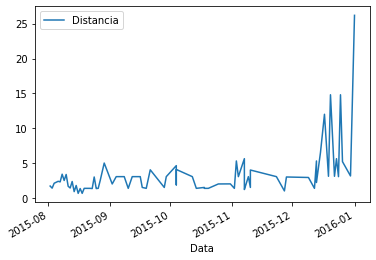

In [18]:
df.plot()

<AxesSubplot:xlabel='Data'>

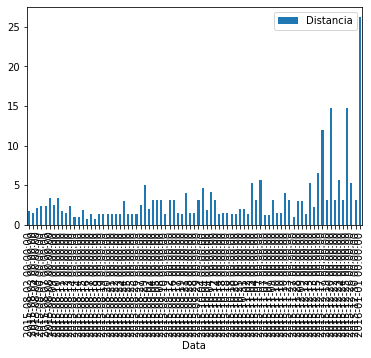

In [19]:
df.plot(kind = 'bar')

Text(0, 0.5, 'Count')

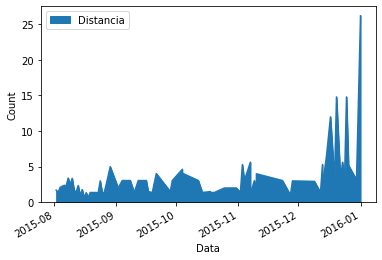

In [20]:
df.plot(kind = 'area')
plt.ylabel("Count")

In [21]:
df.head()

,Distancia,Tempo
Data,,
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN


In [22]:
df.describe()

,Distancia
count,81.000000
mean,3.137531
std,3.634519
min,0.650000
25%,1.370000
50%,2.100000
75%,3.050000
max,26.200000


In [24]:
df.loc['2015-11']

,Distancia,Tempo
Data,,
2015-11-02,1.37,0:08:43
2015-11-03,5.30,0:39:26
2015-11-04,3.05,0:22:12
2015-11-07,5.63,0:49:05
2015-11-07,1.26,NaN
2015-11-07,1.20,NaN
2015-11-09,3.05,0:22:36
2015-11-10,1.50,0:09:00
2015-11-10,1.50,0:11:33


In [26]:
len(df.loc['2015-11'])

13

In [28]:
from datetime import datetime
start = datetime(2015,8,1)
end = datetime(2015,1,2)

In [30]:
start = df.index.min()
end = df.index.max()
print(start, end)

2015-08-02 00:00:00 2016-01-01 00:00:00


In [31]:
df2 = pd.DataFrame(index = pd.date_range(start, end))

In [32]:
df2.head()

""
2015-08-02
2015-08-03
2015-08-04
2015-08-05
2015-08-06


In [33]:
from IPython.display import Image
Image(url = 'sql-join.png')

In [34]:
df.join(df2).head(10)

,Distancia,Tempo
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN
2015-08-08,3.40,NaN
2015-08-09,2.50,NaN
2015-08-10,3.36,0:28:37
2015-08-11,1.67,0:13:07
2015-08-12,1.42,0:10:35


In [35]:
df2.join(df).head(10)

,Distancia,Tempo
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-05,NaN,NaN
2015-08-06,2.38,NaN
2015-08-07,2.30,NaN
2015-08-08,3.40,NaN
2015-08-09,2.50,NaN
2015-08-10,3.36,0:28:37
2015-08-11,1.67,0:13:07


In [36]:
# Definindo o tipo de join (outer)
df.join(df2, how = 'outer')

,Distancia,Tempo
2015-08-02,1.70,NaN
2015-08-03,1.40,NaN
2015-08-04,2.10,NaN
2015-08-05,NaN,NaN
2015-08-06,2.38,NaN
...,...,...
2015-12-28,NaN,NaN
2015-12-29,NaN,NaN
2015-12-30,3.15,0:22:10
2015-12-31,NaN,NaN


<AxesSubplot:xlabel='Data'>

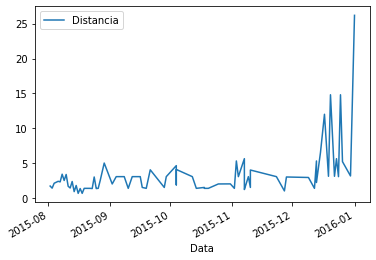

In [37]:
df.plot()

In [38]:
df.Distancia.fillna(0, inplace = True)

<AxesSubplot:xlabel='Data'>

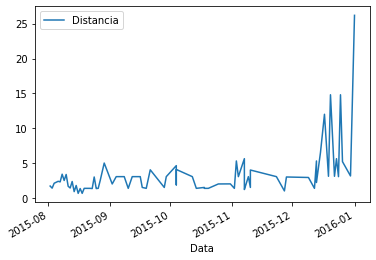

In [39]:
df.plot()

In [40]:
df.to_csv('dataframe_saved_v1.csv')